In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot  as plt
from sklearn.ensemble import  RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline


In [4]:
house=pd.read_csv(HousingData.csv)
house.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


### Context

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): 

CRIM: per capita crime rate by town

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: nitric oxides concentration (parts per 10 million)

RM: average number of rooms per dwelling

AGE: proportion of owner-occupied units built prior to 1940

DIS: weighted distances to ﬁve Boston employment centers

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per 10,000

PTRATIO: pupil-teacher ratio by town 

B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 

LSTAT: % lower status of the population

MEDV: Median value of owner-occupied homes in 1000s

We can see that the input attributes have a mixture of units.

In [5]:
house.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
(house.isnull()).sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
(house==0).sum()

CRIM         0
ZN         360
INDUS        0
CHAS       452
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDV         0
dtype: int64

In [8]:
print(house["ZN"],house["CHAS"])

0      18.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
501     0.0
502     0.0
503     0.0
504     0.0
505     0.0
Name: ZN, Length: 506, dtype: float64 0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Name: CHAS, Length: 506, dtype: float64


In [9]:
house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
house = house.dropna()
house.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Analysisng the RAD - Railway acess index column

In [11]:
house.RAD.unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24])

In [12]:
house.RAD.value_counts()

24    100
4      91
5      90
3      31
2      21
8      19
6      18
1      12
7      12
Name: RAD, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='RAD', ylabel='count'>

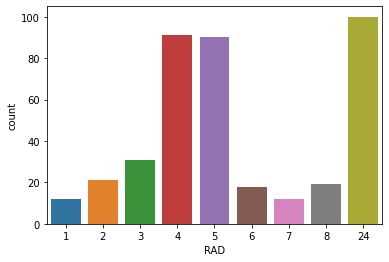

In [13]:
sns.countplot(house.RAD)

In [14]:
bins=(0,4,25)
group_names=["bad_railway_acess" , "good_railway_acess"]
house["Railway_Index"]=pd.cut(house.RAD , bins=bins,labels=group_names)
house["Railway_Index"]

0       bad_railway_acess
1       bad_railway_acess
2       bad_railway_acess
3       bad_railway_acess
5       bad_railway_acess
              ...        
499    good_railway_acess
500    good_railway_acess
502     bad_railway_acess
503     bad_railway_acess
504     bad_railway_acess
Name: Railway_Index, Length: 394, dtype: category
Categories (2, object): ['bad_railway_acess' < 'good_railway_acess']

In [15]:
label_quality=LabelEncoder()
house["Railway_Index"]=label_quality.fit_transform(house["Railway_Index"])
house.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Railway_Index
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,0
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,1
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0,1
11,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9,1
12,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7,1


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Railway_Index', ylabel='count'>

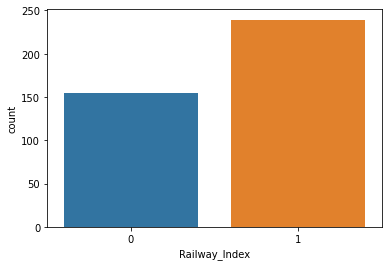

In [16]:
sns.countplot(house["Railway_Index"])

### Test_and_train

In [17]:
house.astype('int32').dtypes
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Railway_Index
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,0


In [18]:
#X=feature
#y=our good houses
X=house.drop("Railway_Index",axis=1)
y=house['Railway_Index']

In [19]:
X_train, X_test, y_train , y_test= train_test_split(X,y,test_size=0.25,random_state=42)
#split data into test abd train in ratio 25/75

In [20]:
#apply standar feature scaling to get optimized result
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [21]:
X_train[:10]

array([[-2.88669541e-01, -4.82423854e-01, -4.46827482e-01,
        -2.69679945e-01, -1.64135928e-01, -9.79778908e-01,
         1.00392518e+00,  5.21079877e-03, -6.62692998e-01,
        -6.10461677e-01,  1.12203354e+00,  2.34452746e-01,
         1.04275104e+00, -9.23745348e-01],
       [-4.07970907e-01, -4.82423854e-01,  2.41447026e-01,
        -2.69679945e-01, -1.02786429e+00, -2.94740962e-02,
        -5.53305548e-01,  5.83366777e-01, -5.48568985e-01,
        -8.05394872e-02,  4.55350149e-02,  3.36972130e-01,
        -1.04456554e-01, -6.60665183e-02],
       [-4.10462071e-01,  3.55096771e+00, -1.42567417e+00,
        -2.69679945e-01, -1.31862433e+00,  1.03710668e+00,
        -1.90009969e+00,  1.83803466e+00, -7.76817011e-01,
        -5.72462041e-02, -7.50137807e-01,  4.46479101e-01,
        -1.13271405e+00,  1.48001243e+00],
       [-3.91160546e-01,  4.82855618e-02, -4.86450961e-01,
        -2.69679945e-01, -2.83860652e-01,  1.78674239e-01,
         8.70648673e-01,  1.21685688e+00, -5.

# RFC Classifier

In [22]:
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
pred_rfc=rfc.predict(X_test)
pred_rfc[:20]

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [23]:
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        53

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99

[[46  0]
 [ 0 53]]


# SVM classifier

In [24]:
clf=SVC()
clf.fit(X_train,y_train)
pred_clf=clf.predict(X_test)

In [25]:
print(classification_report(y_test,pred_clf))
print(confusion_matrix(y_test,pred_clf))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        46
           1       0.90      0.85      0.87        53

    accuracy                           0.87        99
   macro avg       0.87      0.87      0.87        99
weighted avg       0.87      0.87      0.87        99

[[41  5]
 [ 8 45]]


# Neural Model

In [26]:
mlpc=MLPClassifier(hidden_layer_sizes=(14,14,14),max_iter=1100)
mlpc.fit(X_train, y_train)
pred_mlpc=mlpc.predict(X_test)

In [27]:
print(classification_report(y_test,pred_mlpc))
print(confusion_matrix(y_test,pred_mlpc))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        46
           1       0.95      0.98      0.96        53

    accuracy                           0.96        99
   macro avg       0.96      0.96      0.96        99
weighted avg       0.96      0.96      0.96        99

[[43  3]
 [ 1 52]]


In [28]:
from sklearn.metrics import accuracy_score
cm=accuracy_score(y_test,pred_rfc)
cm

1.0